# CAN I GET A LITTLE CREDIT? 
### An Exploration of Credit Worthiness
### Using Classification to Predict Serious Repayment Delinquency

-----

**Personal Project & Final Report Created By:** Rachel Robbins-Mayhill | April 27, 2022

---

<img src='loan_risk.png' width="1500" height="500" align="center"/>

## PROJECT DESCRIPTION

Banks play a crucial role in market economies. They decide who can get financing and on what terms and can make or break investment decisions. For markets and society to function, individuals and companies need access to credit. 

Credit scoring algorithms, which make a guess at the probability of default, are the methods banks use to determine whether or not a loan should be granted. This project aims to improve upon the state of the art in credit scoring, by predicting the probability that somebody will experience serious delinquency in the next two years. For the purpose of this project 'Serious Delinquency' is defined as being 90 days or more past due on payment. 

I am interested in this project because identifying at-risk borrower populations helps to protect the consumer, the business, the market, and society as a whole. Identifying borrowers who are at risk of default helps to prevent the consumer from entering into a situation that could be harmful to their long-term financial stability. It helps the banking institution prevent significant and costly losses which could impact business sustainability and limit the potential to help others. Lastly, as we saw with the housing crisis of 2008, accurately identifying at-risk loan borrowers can prevent the destabilizing of the market which can have far-reaching consequences for society as a whole.

## EXECUTIVE SUMMARY

## PROJECT GOAL

The goal of this project is to build a model that can used to help borrowers and banking institutions make the best financial decisions.

## INITIAL QUESTIONS:
Data-Focused Questions

- Are borrowers in certain age groups more likely to be seriously delinquent?
- Are borrowers with lower monthly income more likely to be seriously delinquent?
- Are borrowers with higher debt to income ratio more likely to be seriously delinquent?
- Are borrowers with higher revolving unsecured line utilization more likely to be seriously delinquent?

=================================================================================================================================================================================================================================

## I. ACQUIRE

In [1]:
# Import for data manipulation
import pandas as pd
import numpy as np

# Import for acquisition
import os
import wrangle

# Import to ignore warnings
import warnings
warnings.filterwarnings('ignore')

The data for this report was acquired by accessing the 'client_data.csv.'  The .csv provides historical data on 150,000 borrowers and it can be found in the 'Personal Project' repository on GitHub. The data acquisition for this project requires the .csv file of the data to be saved locally.  Once the .csv file has been saved locally, the data can be accessed using the get_client_data function saved within the wrangle.py file inside the 'Personal Project' repository on GitHub. This function acquires data from a local .csv file and returns a dataframe using pandas. The function informs the user of completion.

In [2]:
df = wrangle.get_client_data()

Reading from .csv file.
Data acquisition complete.


In [3]:
df.shape

(150000, 12)

## The Original DataFrame Size: 150,000 rows, or observations, and 12 columns.

=================================================================================================================================================================================================================================

## II. PREPARE

After data acquisition, the table was analyzed and cleaned to facilitate functional exploration and clarify variable confusion. The preparation of this data can be replicated using the wrangle_client function saved within the wrangle.py file inside the 'personal project' repository on GitHub. The function takes in the original client_data dataframe and returns it with the changes noted below.

**Steps Taken to Clean & Prepare Data:**

- Delete "Unnamed' index
- Rename columns for understanding, while making lowercase
- Drop missing values (29_731 in monthly_income and 3_924 in quantity_dep)
- Create categorical columns for binning age and dependents

---

### Results of Data Preparation

In [4]:
# apply the data preparation observations and tasks to clean the data using the wrangle_client function found in the wrangle.py
df = wrangle.wrangle_client(df)
df.head()

,serious_delinquency,revolv_unsec_utilization,age,quantity_30_59_pd,debt_to_income_ratio,monthly_income,quantity_loans_and_lines,quantity_90_days_pd,quantity_real_estate_loans,quantity_60_89_days_pd,quantity_dependents,age_bins,quantity_dependents_bins
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0,age_45-54,1_2_dep
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0,age_35-44,1_2_dep
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0,age_35-44,0_dep
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0,age_25-34,0_dep
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0,age_65-74,1_2_dep


In [5]:
# obtain the number of rows and columns for the dataframe. 
df.shape

(114560, 13)

## Prepared DataFrame Size: 120,269 rows, 11 columns

----

### PREPARE - SPLIT

After preparing the data, it was split into 3 samples; train, validate, and test using:

- Random State: 123
- Test = 20% of the original dataset
- The remaining 80% of the dataset is divided between valiidate and train
    - Validate (.30*.80) = 24% of the original dataset
    - Train (.70*.80) = 56% of the original dataset
    
The split of this data can be replicated using the split_data function saved within the wrangle.py file inside the 'personal project' repository on GitHub.




In [6]:
# split the data into train, validate, and test using the split_data function found in the wrangle.py
train, validate, test = wrangle.split_data(df)

train -> (64153, 13)
validate -> (27495, 13)
test -> (22912, 13)


==================================================================================================================================================================================================

## III. EXPLORE

In [7]:
# Import for data viz
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.ticker import StrMethodFormatter

---

### EXPLORE QUESTIONS

- Are borrowers in certain age groups more likely to be seriously delinquent?
- Are borrowers with lower monthly income more likely to be seriously delinquent?
- Are borrowers with higher debt to income ratio more likely to be seriously delinquent?
- Are borrowers with higher revolving unsecured line utilization more likely to be seriously delinquent?

---

## QUESTION: AGE
### - Are borrowers in certain age groups more likely to be seriously delinquent?

In order to answer this question, the age variable has been feature engineered into categorical bins to see patterns in ages realted to serious delinquency.

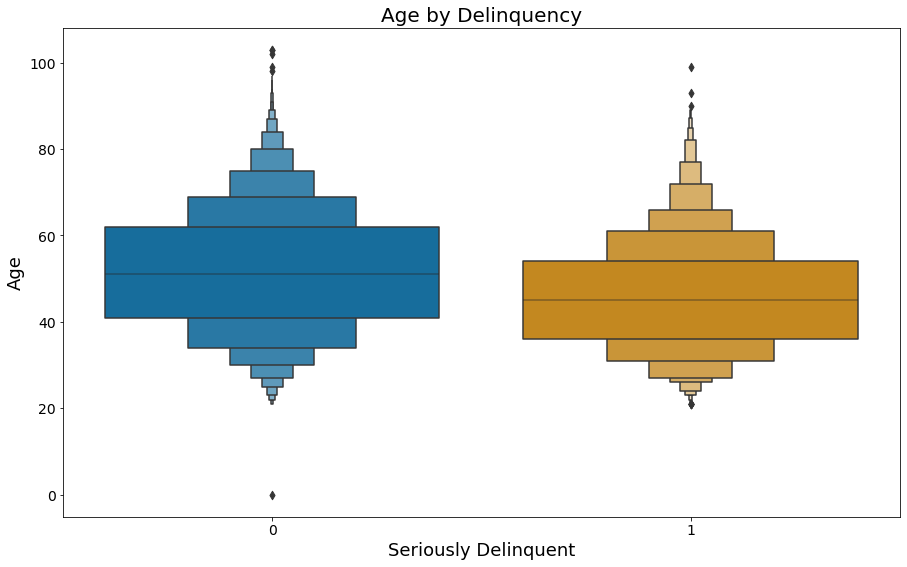

In [8]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
sns.boxenplot(x='serious_delinquency',y='age',data=train, palette='colorblind')
plt.title("Age by Delinquency", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Age', fontsize=18) 
plt.yticks(fontsize=14)
plt.show()

**Observation:** Those who are seriously delinquent tend to be younger than those who are not. Binning and a countpot will be used to try to determine where most seriously delinquent borrrowers fall within the age category. 

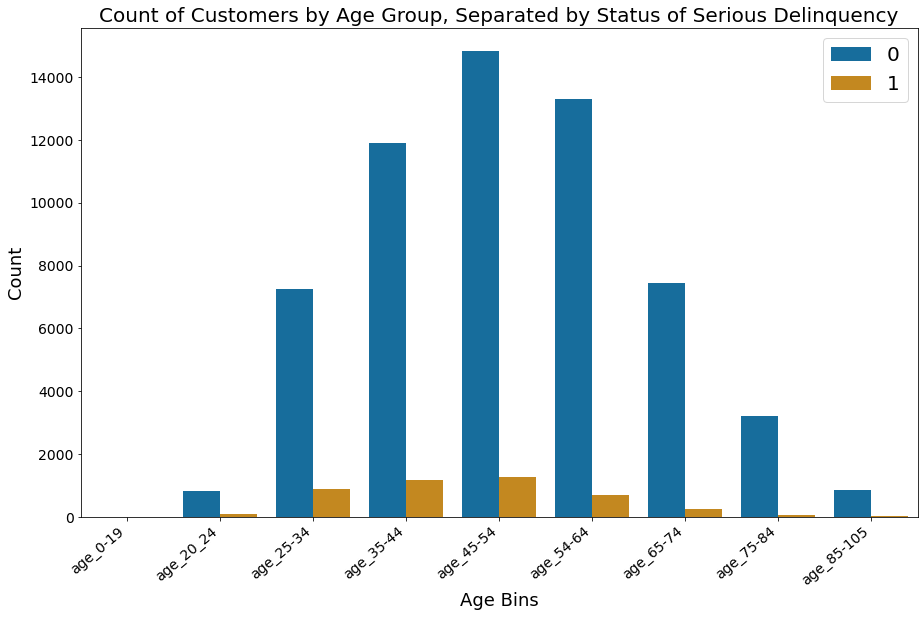

In [9]:
# Create visualization with designated size, title, x label, y label, and font size. 
plt.figure(figsize=(15,9))
sns.countplot(x='age_bins', hue='serious_delinquency', data=train, palette='colorblind')
plt.title("Count of Customers by Age Group, Separated by Status of Serious Delinquency", fontsize=20)
plt.xlabel('Age Bins', fontsize=18) 
plt.xticks(fontsize=14, rotation= 40, ha='right')
plt.ylabel('Count', fontsize=18) 
plt.yticks(fontsize=14)
plt.legend(fontsize=20)
plt.show()

In [10]:
# obtain ratio of serious delinquency per age group
train.groupby('age_bins').serious_delinquency.mean().sort_values(ascending=False)

age_bins
age_25-34     0.109924
age_35-44     0.091298
age_20_24     0.091008
age_45-54     0.080047
age_54-64     0.051128
age_65-74     0.032568
age_85-105    0.022805
age_75-84     0.021845
age_0-19           NaN
Name: serious_delinquency, dtype: float64

**Observation:** It appears through the visualization that serious delinquency occurs more frequently between 25 and 45 years old. As previously noted, there is about a 7% serious delinquency rate within this data set. When looking at the ratio of delinquency between the age groups, ages 20-24 (9%), 25-34 (11%), and 35-44(9%) all have above average ratios of serious delinquency. Statistical testing will be conducted to verify statistical relevance of observations. 

### Statistical Testing

In [11]:
# Import for Hypothesis Testing
import scipy.stats as stats

Chi^2 Statistical Testing will be conducted because the variables age bins and serious delinquency are both categorical/discrete.

Hypothesis:
- H$_{0}$: Serious Delinquency is independent of age. 
- H$_{a}$: Serious Delinquency is NOT independent of age.

In [12]:
# Conduct chi^2 statistical test
observed = pd.crosstab(train['age_bins'], train.serious_delinquency)

# Set alpha
alpha= 0.05
chi2, p, degf, expected = stats.chi2_contingency(observed)

print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

if p < alpha:
    print("We reject the hypothesis, our data is statistically relevant.")
else:
    print("We fail to reject the null hypothesis.")

chi^2 = 706.8000
p     = 0.0000
We reject the hypothesis, our data is statistically relevant.


## ANSWER: AGE
### - Yes, borrowers in certain age groups are more likely to be seriously delinquent, particulary those between the ages of 20 and 44. 

---

## QUESTION: Monthly Income
### - Is monthly income for borrowers with serious delinquency less than those who are not seriously delinquent?

In order to answer this question, the monthly income variable was manually scaled to represent a monthly income that is more expected from those seeking credit. The dataset included observations for only those with monthly_income at \\$15, 000 or less.

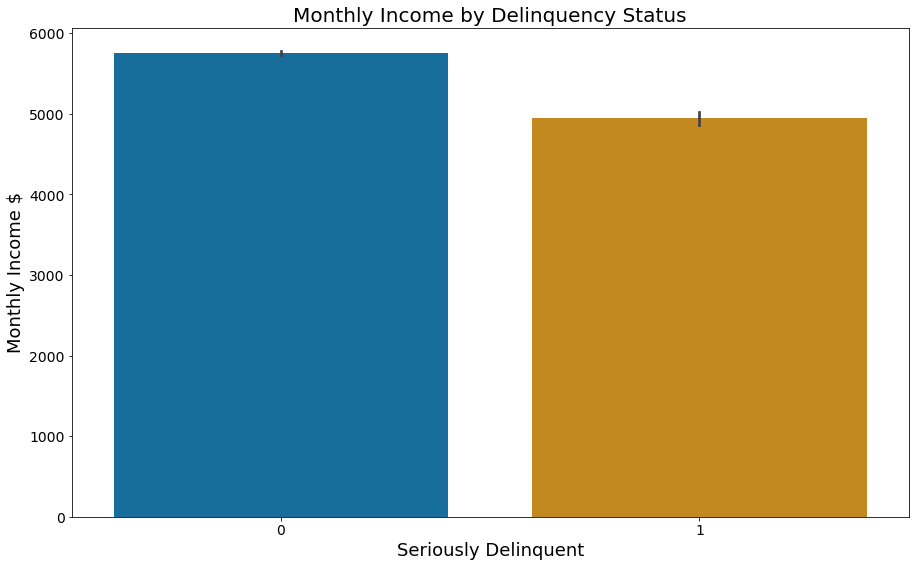

In [13]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
sns.barplot(data = train, y = 'monthly_income', x = 'serious_delinquency', palette='colorblind')
#sns.boxplot(x='serious_delinquency',y='monthly_income',data=train, palette='colorblind')
plt.title("Monthly Income by Delinquency Status", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Monthly Income $', fontsize=18) 
plt.yticks(fontsize=14)
plt.show()

In [14]:
# Obtain average monthly income for those who are seriously delinquent and those who are not. 
train.groupby(['serious_delinquency']).monthly_income.agg(['min', 'mean', 'max'])

,min,mean,max
serious_delinquency,,,
0,0.0,5756.197434,14999.0
1,0.0,4943.006191,14932.0


**Observation:** It appears through the visualization that serious delinquency occurs more frequently for those with lower monthly incomes. When looking at the mean monthly income for those with serious delinquency, it is about \\$800 less than those without serious delinquency. Statistical testing will be conducted to verify statistical relevance of observations. 

### Statistical Testing
T-Test Statistical Testing will be conducted because the we are using the mean of monthly income for each category of delinquency (a mean of a subgroup vs. a mean of a subgroup).

- H$_{0}$: Mean of monthly income of seriously delinquent borrowers > Mean of monthly charges of borrowers who are not seriously delinquent. 
- H$_{a}$: Mean of monthly income of seriously delinquent borrowers <= Mean of monthly charges of borrowers who are not seriously delinquent.

<AxesSubplot:>

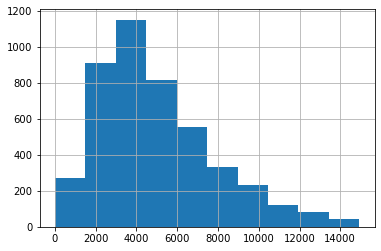

In [15]:
delinquent_sample = train[train.serious_delinquency == 1].monthly_income
delinquent_sample.hist()

<AxesSubplot:>

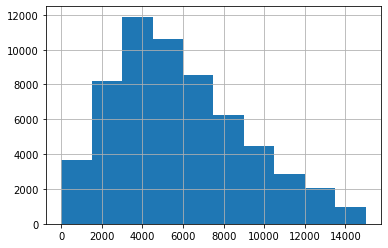

In [16]:
no_delinquent_sample = train[train.serious_delinquency == 0].monthly_income
no_delinquent_sample.hist()

In [17]:
print(delinquent_sample.var())
print(no_delinquent_sample.var())

8144981.938042171
10359135.66235622


In [18]:
# 1-Tailed, 2-Sample T-Test - Mean of Subgroup vs. Mean of Subgroup

alpha = 0.05
delinquent_sample = train[train.serious_delinquency == 1].monthly_income
no_delinquent_sample = train[train.serious_delinquency == 0].monthly_income
t, p = stats.ttest_ind(delinquent_sample, no_delinquent_sample , equal_var=False)
t, p / 2

print(t, p/2, alpha)

-18.30047745186004 6.017563562087364e-73 0.05


In [23]:
print("is p/2 < alpha? ", p / 2 < alpha)
print("is t < 0? ", t < 0)

is p/2 < alpha?  True
is t < 0?  True


- H$_{0}$: Mean of monthly charges of seriously delinquent borrowers = Mean of monthly charges of borrowers who are not seriously delinquent. 
- H$_{a}$: Mean of monthly charges of seriously delinquent borrowers != Mean of monthly charges of borrowers who are not seriously delinquent.

In [20]:
if p / 2 > alpha:
    print("We fail to reject $H_{0}$")
elif t < 0:
    print("We fail to reject $H_{0}$")
else:
    print("We reject $H_{0}$")

We fail to reject $H_{0}$


In [21]:
t, p = stats.ttest_ind(delinquent_sample, no_delinquent_sample, equal_var=False)

t, p

print("Is t < 0? ", t < 0)

print("is p/2 < alpha? ", p / 2 < alpha)

Is t < 0?  True
is p/2 < alpha?  True


## QUESTION: Revolving Unsecured Line Utilization
- Are borrowers with higher revolving unsecured line utilization more likely to be seriously delinquent?

NameError: name 'ax' is not defined

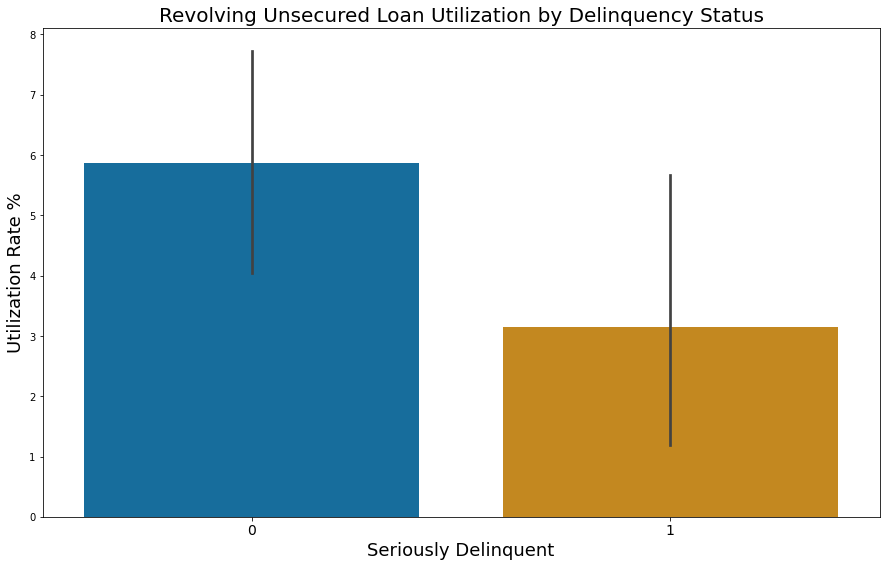

In [22]:
# Create visualization with designated size, title, x label, y label, and font size, as well as font-size and labels for x and y ticks. 
plt.figure(figsize=(15,9))
labels = ['No Serious Delinquency', 'Serious Delinquency']
sns.barplot(data = train, y = 'revolv_unsec_utilization', x = 'serious_delinquency', palette='colorblind')
plt.title("Revolving Unsecured Loan Utilization by Delinquency Status", fontsize=20)
plt.xlabel('Seriously Delinquent', fontsize=18) 
plt.xticks(fontsize=14)
plt.ylabel('Utilization Rate %', fontsize=18) 
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:.00%}'))
plt.yticks(fontsize=14)
plt.show()

In [ ]:
train.groupby(['serious_delinquency']).revolv_unsec_utilization.agg(['min', 'mean', 'max'])

## QUESTION
- Are borrowers with previous delinquency between 30 and 89 days more likely to be seriously delinquent (boolean)?

### EXPLORATION SUMMARY

===================================================================================================================================

## IV. MODEL

In [ ]:
# Import for modeling
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

Because serious delinquency is a yes or no (boolean) value, classification machine learning algorithms were used to fit to the training data and the models were evaluated on validate data. The best model was selected using accuracy, because the data is mostly balanced, and the risk of an event happening balances the risk of getting a prediction wrong. In other words, the model was optimized for identifying true positives (actual delinquency when predicted), and true negatives (no serious delinquency when predicted), while minimizing false positive and false negatives.

### MODEL - SCALE
- Scaling was done manually to monthly income inside the prep function. Monthly income was scaled to include only observations below \\$15,000 to be more in line wiht the typical borrower. By including only the observations noted, 95\\% of the data was still retained. 

### Set X & y

In [ ]:
# create X & y version of train, where y is a series with just the target variable and X are all the features. 
X_train = train.drop(columns=['serious_delinquency','quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_train = train.serious_delinquency

X_validate = validate.drop(columns=['serious_delinquency', 'quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_validate = validate.serious_delinquency

X_test = test.drop(columns=['serious_delinquency', 'quantity_90_days_pd', 'age_bins', 'quantity_dependents_bins'])
y_test = test.serious_delinquency

### Set Baseline

In [ ]:
# Obtain the mode for the target
baseline = y_train.mode()

# produce boolean array with True assigned to match the baseline prediction and real data. 
matches_baseline_prediction = (y_train == 0)

baseline_accuracy = matches_baseline_prediction.mean()

print(f'Baseline Accuracy: {baseline_accuracy:.2%}')

### MODEL - DECISION TREE

In [ ]:
#Create the object
clf1 = DecisionTreeClassifier(max_depth=2, random_state=123)
# Fit the model
clf1 = clf1.fit(X_train, y_train)

In [ ]:
#Visualize the model
plt.figure(figsize=(22, 12))
plot_tree(clf1,feature_names=X_train.columns)

In [ ]:
# make predictions
y_pred = clf1.predict(X_train)

In [ ]:
y_pred_proba = clf1.predict_proba(X_train)
pd.DataFrame(y_pred_proba, columns = ['Not Seriously Delinquent', 'Seriously Delinquent']).head()

### Evaluate Model

In [ ]:
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
      .format(clf1.score(X_train, y_train)))

### Create a Confusion Matrix
- True Positive: number of occurrences where serious delinquency is true and serious delinquency is predicted true.
- True Negative: number of occurrences where serious delinquency is false and serious delinquency is predicted false.
- False Positive: number of occurrences where serious delinquency is false and serious delinquency is predicted true.
- False Negative: number of occurrences where serious delinquency is true and serious delinquency is predicted false.

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
confusion_matrix(y_train, y_pred)

In [ ]:
y_train.value_counts()

In [ ]:
labels = sorted(y_train.unique())

pd.DataFrame(confusion_matrix(y_train, y_pred), index=labels, columns=labels)

### Create a Classification Report
- Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [ ]:
print(classification_report(y_train, y_pred))

### Evaluate the Model with our Validate dataset

In [ ]:
print('Accuracy of Decision Tree classifier on validate set: {:.2f}'
     .format(clf1.score(X_validate, y_validate)))

In [ ]:
# Produce y_predictions that come from the X_validate
y_pred = clf1.predict(X_validate)

# Compare actual y values (from validate) to predicted y_values from the model run on X_validate
print(classification_report(y_validate, y_pred))

### Model - RANDOM FOREST

In [ ]:
# Evaluate Random Forest models on train & validate set 
# by looping through different values for max_depth and min_samples_leaf hyperparameters

# create empty list for which to append metrics from each loop
scores = []
max_value = range(1,21)
# create loop for range 1-20
for i in max_value:
    # set depth & n_samples to value for current loop
    depth = i
    n_samples = i
    # define the model setting hyperparameters to values for current loop
    forest = RandomForestClassifier(max_depth=depth, min_samples_leaf=n_samples, random_state=123)
    # fit the model on train
    forest = forest.fit(X_train, y_train)
    # use the model and evaluate performance on train
    in_sample_accuracy = forest.score(X_train, y_train)
    # use the model and evaluate performance on validate
    out_of_sample_accuracy = forest.score(X_validate, y_validate)
    # create output of current loop’s hyperparameters and accuracy to append to metrics
    output = {
        'min_samples_per_leaf': n_samples,
        'max_depth': depth,
        'train_accuracy': in_sample_accuracy,
        'validate_accuracy': out_of_sample_accuracy
    }
    scores.append(output)
# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(scores)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
# The Random Forest model that performed the best on train & validate set had max_depth of 12 and min_sample_leaf of 12. 
# Isolating that model to use as best performing model. 

# define the model setting hyperparameters to values for the best performing model
forest = RandomForestClassifier(max_depth=13, min_samples_leaf=13, random_state=123)

# fit the model on train
forest = forest.fit(X_train, y_train)

# use the model and evaluate performance on train
train_accuracy = forest.score(X_train, y_train)
# use the model and evaluate performance on validate
validate_accuracy = forest.score(X_validate, y_validate)

print(f'train_accuracy: {train_accuracy: 2%}')
print(f'validate_accuracy: {validate_accuracy: 2%}')

### Model - LOGISTIC REGRESSION

In [ ]:
# Evaluate Logistic Regression models on train & validate set by looping through different values for c hyperparameter

# create empty list for which to append metrics from each loop
metrics = []

# create loop for values in list
for c in [.001, .005, .01, .05, .1, .5, 1, 5, 10, 50, 100, 500, 1000]:
            
    # define the model setting hyperparameters to values for current loop
    logit = LogisticRegression(C=c)
    
    # fit the model on train
    logit.fit(X_train, y_train)
    
    # use the model and evaluate performance on train
    train_accuracy = logit.score(X_train, y_train)
    # use the model and evaluate performance on validate
    validate_accuracy = logit.score(X_validate, y_validate)
    
    # create output of current loop's hyperparameters and accuracy to append to metrics
    output = {
        'C': c,
        'train_accuracy': train_accuracy,
        'validate_accuracy': validate_accuracy
    }
    
    metrics.append(output)

# convert metrics list to a dataframe for easy reading
df = pd.DataFrame(metrics)
# add column to assess the difference between train & validate accuracy
df['difference'] = df.train_accuracy - df.validate_accuracy
df

In [ ]:
# Feature importance
print('Coefficient: \n', logit.coef_)
print('Intercept: \n', logit.intercept_)

In [ ]:
#Make Probability
y_pred = logit.predict(X_train)

In [ ]:
# Estimate Predictions
y_pred_proba = logit.predict_proba(X_train)

Evaluate the Model with Our Validate Set
Done in Function above
The Logistic Regression Model that performed best had a c-statistic of 0.1 with a train accuracy of 93.0% and validate accuracy of 93.0.% performing nearly the same as baseline on unseen (validate) data.`m

### Create a Confusion Matrix
- True Positive: number of occurrences where churn is true and churn is predicted true.
- True Negative: number of occurrences where churn is false and churn is predicted false.
- False Positive: number of occurrences where churn is false and churn is predicted true.
- False Negative: number of occurrences where churn is true and churn is predicted false.

In [ ]:
print(confusion_matrix(y_train, y_pred))

Create Classification Report
Acuracy isn't everything, look at other evaluation metrics, such as recalll and precision.

In [ ]:
print(classification_report(y_train, y_pred))

### Best Model Overall
- The best performing model overall was the _, performing _ on train, __ on validate, and optimized for ___.
- This model will now be used on the test data to confirm best performance.

=========================================================================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS

===================================================================================================================================

## V. CONCLUSION

### RECOMMENDATIONS

### NEXT STEPS